✅ Dataset loaded successfully!

📋 Dataset preview:


,Client_ID,Age,Monthly_Income,Credit_Score,Risk_Level,Loan_Amount,PD,LGD,EAD,Expected_Loss
0,1,56,1000.00,618,Medium,10616.06,0.10,0.5,10616.06,530.80
1,2,69,4777.20,470,High,40345.62,0.25,0.7,40345.62,7060.48
2,3,46,1738.83,640,Medium,22455.38,0.10,0.5,22455.38,1122.77
3,4,32,6674.18,535,Medium,33952.31,0.10,0.5,33952.31,1697.62
4,5,60,5916.50,547,Medium,34413.36,0.10,0.5,34413.36,1720.67



📊 Basic statistics:


,Client_ID,Age,Monthly_Income,Credit_Score,Loan_Amount,PD,LGD,EAD,Expected_Loss
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,46.247000,5165.870740,601.950000,30323.017000,0.099790,0.46580,30323.017000,1662.704570
std,288.819436,16.288072,2390.683778,97.390166,14883.954191,0.069789,0.13209,14883.954191,1942.009407
min,1.000000,18.000000,1000.000000,300.000000,1000.000000,0.030000,0.30000,1000.000000,9.000000
25%,250.750000,33.000000,3439.922500,537.750000,19510.467500,0.030000,0.30000,19510.467500,338.075000
50%,500.500000,46.000000,5105.505000,601.000000,30369.690000,0.100000,0.50000,30369.690000,1158.130000
75%,750.250000,60.250000,6703.995000,668.000000,40230.845000,0.100000,0.50000,40230.845000,2064.095000
max,1000.000000,74.000000,12697.200000,850.000000,88893.570000,0.250000,0.70000,88893.570000,11340.110000



📈 Grouped summary by Risk Level:


,PD,LGD,EAD,Expected_Loss
Risk_Level,,,,
High,0.25,0.7,29532.70,5168.22
Low,0.03,0.3,30381.17,273.43
Medium,0.10,0.5,30505.60,1525.28


interactive(children=(IntRangeSlider(value=(25, 60), description='Age:', max=75, min=18), IntRangeSlider(value…

C:\Users\pedro\AppData\Local\Temp\ipykernel_29280\2455581787.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Risk_Level", palette="coolwarm")


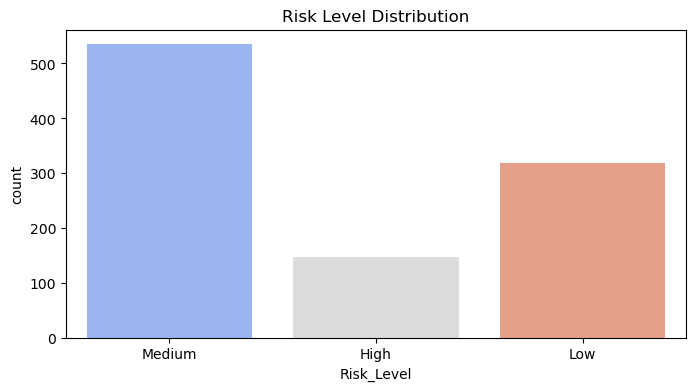

C:\Users\pedro\AppData\Local\Temp\ipykernel_29280\2455581787.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Risk_Level", y="Expected_Loss", palette="Set2")


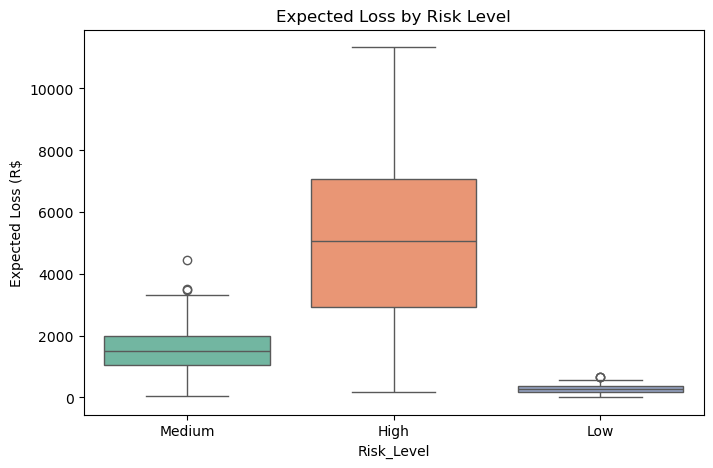

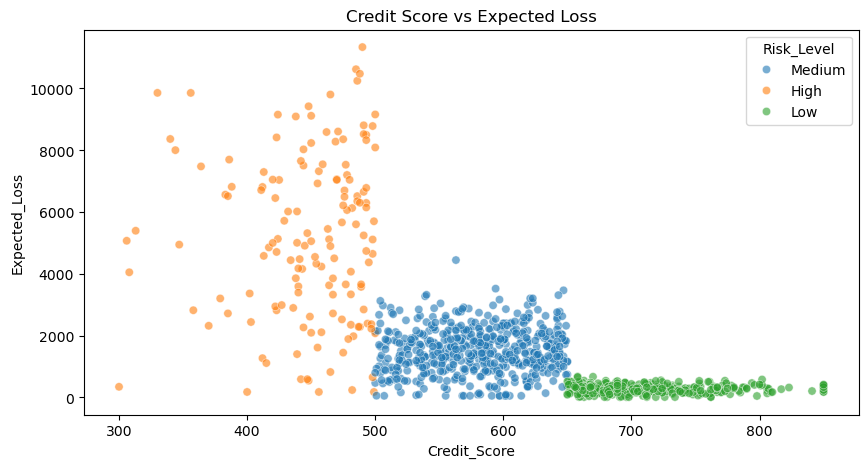

📤 Summary exported to 'credit_risk_summary_export.xlsx'


In [1]:
# credit_risk_simulation.ipynb

# Cell 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Cell 2: Load dataset
file_path = "client_credit_risk_base_en.xlsx"  # update if needed

try:
    df = pd.read_excel(file_path)
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ File not found. Please check the path.")

# Cell 3: Overview
print("\n📋 Dataset preview:")
display(df.head())

print("\n📊 Basic statistics:")
display(df.describe())

# Cell 4: Risk level summary
print("\n📈 Grouped summary by Risk Level:")
grouped_stats = df.groupby("Risk_Level")[["PD", "LGD", "EAD", "Expected_Loss"]].mean().round(2)
display(grouped_stats)

# Cell 5: Filter widgets
age_slider = widgets.IntRangeSlider(value=[25, 60], min=18, max=75, step=1, description='Age:')
score_slider = widgets.IntRangeSlider(value=[400, 800], min=300, max=850, step=10, description='Score:')
risk_selector = widgets.SelectMultiple(options=df["Risk_Level"].unique(), value=tuple(df["Risk_Level"].unique()), description='Risk:')

# Cell 6: Filter function
def filter_data(age_range, score_range, risk_levels):
    return df[(df["Age"].between(age_range[0], age_range[1])) &
              (df["Credit_Score"].between(score_range[0], score_range[1])) &
              (df["Risk_Level"].isin(risk_levels))]

# Cell 7: Filtered stats display
def update_filtered_stats(age_range, score_range, risk_levels):
    filtered = filter_data(age_range, score_range, risk_levels)
    print(f"\n📊 Filtered sample size: {len(filtered)}")
    display(filtered.describe())
    return filtered

# Cell 8: Interact
widgets.interact(update_filtered_stats, age_range=age_slider, score_range=score_slider, risk_levels=risk_selector)

# Cell 9: Visualization - Risk distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Risk_Level", palette="coolwarm")
plt.title("Risk Level Distribution")
plt.show()

# Cell 10: Visualization - Expected Loss by Risk
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Risk_Level", y="Expected_Loss", palette="Set2")
plt.title("Expected Loss by Risk Level")
plt.ylabel("Expected Loss (R$")
plt.show()

# Cell 11: Visualization - Score vs Expected Loss
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Credit_Score", y="Expected_Loss", hue="Risk_Level", alpha=0.6)
plt.title("Credit Score vs Expected Loss")
plt.show()

# Cell 12: Optional Export
summary = df.groupby("Risk_Level")["Expected_Loss"].agg(["count", "mean", "sum"]).round(2)
summary.to_excel("credit_risk_summary_export.xlsx")
print("📤 Summary exported to 'credit_risk_summary_export.xlsx'")
